# Trees ed entuple

### Alcune definizioni:

- Evento : insieme di informazioni corrispondenti ad un avvenimento fisico

- Entupla : insieme di eventi in cui ognuno ha struttura tabulare

- Tree : insieme di eventi in cui ci sono oggetti "con struttura" più complessi, che in principio possono essere anch'essi ramificati.


In genere useremo dei "Tree", anche se per la maggior parte dei casi non avremo bisogno solo della struttura tabulare.

## Files degli OPEN Data del CERN:

Prendiamo un campione di dati dagli OPEN Data del CERN (vedi anche CERN open data : http://opendata.cern.ch/search?page=1&size=20&experiment=CMS&subtype=Simulated&type=Dataset )

In particolare prendiamo una simulazione di eventi Drell-Yan (Z o fotoni ) che producono due leptoni nello stato finale. Documentazione: http://opendata.cern.ch/record/1395

Altro processo che considereremo: top quark-antiquark http://opendata.cern.ch/record/1359

Nota bene: i formati forniti tipicamente contengono molte più variabili di quelle che ci interessano - partiremo da un esempio con un certo grado di "predigestione"

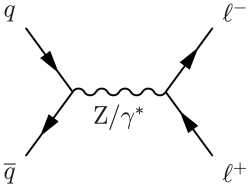

## Analisi degli open data:

Questi files sono stati processati di modo da ottenere un formato più compatto:

https://github.com/oiorio/AnalisiDati/tree/main/5.%20Entuple%20e%20formati%20di%20dati%20complessi

In [3]:
os.system("mv DYJets.root DYJets_backup.root")

0

In [4]:
import os,sys,subprocess as sp

# Mettiamo l'indirizzo in una stringahttps://github.com/oiorio/AnalisiDati/raw/main/5.%20Entuple%20e%20formati%20di%20dati%20complessi/DYJets.root
address_tree =  "https://github.com/oiorio/AnalisiDati/raw/main/5.%20Entuple%20e%20formati%20di%20dati%20complessi/DYJets.root"
#address_tree = "https://github.com/oiorio/AnalisiDati/raw/cf9599b45cd34f1aae71384a5b9b708f0e51a787/5.%20Entuple%20e%20formati%20di%20dati%20complessi/DYJets.root"

#prima controlliamo se il file è già in locale:
if os.path.exists("DYJets.root"):
    print("il File c'è già! Non sarà riscaricato.")
    download=[0,0]

In [5]:
if not os.path.exists("DYJets.root") :
    #utilizzo subprocess, in particolare getstatusoutput
    download = sp.getstatusoutput("wget "+address_tree) 

    #fa 3 cose:
    #1 esegue il comando
    #2 salva lo status, se è andato a buon fine o se è fallito, e come 
    #3 salva l'output.

print(download) #vediamo se è andato a buon fine!

(0, '--2023-12-13 09:57:29--  https://github.com/oiorio/AnalisiDati/raw/main/5.%20Entuple%20e%20formati%20di%20dati%20complessi/DYJets.root\nResolving github.com (github.com)... 140.82.121.4\nConnecting to github.com (github.com)|140.82.121.4|:443... connected.\nHTTP request sent, awaiting response... 302 Found\nLocation: https://raw.githubusercontent.com/oiorio/AnalisiDati/main/5.%20Entuple%20e%20formati%20di%20dati%20complessi/DYJets.root [following]\n--2023-12-13 09:57:30--  https://raw.githubusercontent.com/oiorio/AnalisiDati/main/5.%20Entuple%20e%20formati%20di%20dati%20complessi/DYJets.root\nResolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...\nConnecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.\nHTTP request sent, awaiting response... 200 OK\nLength: 2152475 (2.1M) [application/octet-stream]\nSaving to: ‘DYJets.root’\n\n     0K .......... .......... .......... 

In [6]:
download = sp.getstatusoutput("wget "+address_tree) 


In [8]:
print(download[1]) #vediamo l'output

--2023-12-13 09:59:22--  https://github.com/oiorio/AnalisiDati/raw/main/5.%20Entuple%20e%20formati%20di%20dati%20complessi/DYJets.root
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/oiorio/AnalisiDati/main/5.%20Entuple%20e%20formati%20di%20dati%20complessi/DYJets.root [following]
--2023-12-13 09:59:22--  https://raw.githubusercontent.com/oiorio/AnalisiDati/main/5.%20Entuple%20e%20formati%20di%20dati%20complessi/DYJets.root
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2152475 (2.1M) [application/octet-stream]
Saving to: ‘DYJets.root.1’

     0K .......... .......... .......... .......... ....

In [11]:
# e ora vediamo l'output del comando ls usato per trovare tutti i fils che finiscono con root!
print(sp.getstatusoutput("ls -ltrha *.root" )[1]) 

-rwxrwxrwx 1 orso orso 2.1M Oct  4 09:57 DYJets_backup.root
-rwxrwxrwx 1 orso orso 2.1M Dec 13 09:57 DYJets.root


### Cosa c'è nel tree?

Genericamente apriamo il file root con:

   root -l DYJets.root
   
In realtà faccio:

In [12]:
import ROOT #sperando che funzioni...

inputFile = ROOT.TFile("DYJets.root","OPEN") #Così apro il file

print(inputFile.GetListOfKeys().Print())#Questo stampa le "chiavi" del file. 
#Come per una mappa o un dizionario ho un "item" in corrispondenza di una "key", in root ogni oggetto
#salvato in formato persistente ha una chiave

Welcome to JupyROOT 6.26/00
None
Collection name='THashList', class='THashList', size=1
 TKey Name = trees, Title = trees, Cycle = 1


In [13]:
#trovo un oggetto, posso chiamarlo con il punto come se fosse un metodo:
inputFile.trees

In [7]:
#Scopro che è una "TDirectoryFile": posso di nuovo vedere il contenuto:
print(inputFile.trees.GetListOfKeys().Print())

None
Collection name='THashList', class='THashList', size=1
 TKey Name = events, Title = events, Cycle = 1


In [8]:
#Che a sua volta è:
inputFile.trees.events

In [15]:
#Questo è un TTree!
#da PyRoot posso aprirlo come in C++

#Maniera alla C++
mytree = inputFile.Get("trees/events")

#Maniera alla python
mytree2 = inputFile.trees.events

In [16]:
mytree2.Print()

******************************************************************************
*Tree    :events    : events                                                 *
*Entries :    10000 : Total =         6071498 bytes  File  Size =    2146782 *
*        :          : Tree compression factor =   2.82                       *
******************************************************************************
*Br    0 :muontracks_size : muontracks_size/I                                *
*Entries :    10000 : Total  Size=      40693 bytes  File Size  =       6331 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression=   6.34     *
*............................................................................*
*Br    1 :muontracks_pt : vector<float>                                      *
*Entries :    10000 : Total  Size=     175411 bytes  File Size  =      71181 *
*Baskets :        7 : Basket Size=      32000 bytes  Compression=   2.46     *
*...................................................

In [19]:
#Come faccio a prendere un componente di un tree?

#Maniera "alla python"

mytree.GetEntry(3)

nMuons = mytree.muontracks_size

print(nMuons)

2


In [20]:
mytree.GetEntry(1)

nMuons = mytree.muontracks_size

print(nMuons)

mytree.GetEntry(11)
print(mytree.muontracks_size)

0
0


In [21]:
#Maniera alla C++
import array
nMuons_arr = array.array('i',[0])#1) creiamo un "contenitore" per la nostra variabile

mytree.SetBranchAddress("muontracks_size",nMuons_arr)

mytree.GetEntry(0)

print(nMuons_arr)

mytree.GetEntry(1)

print(nMuons_arr)

array('i', [2])
array('i', [0])


In [31]:
mytree.GetEntry(0)
print(mytree.muontracks_size)
print(mytree.muontracks_pt)

2
{ 53.3174f, 44.2132f }


## Per visualizzare gli oggetti in un tree abbiamo diversi modi:

1. In maniera "iterativa": iterando evento per evento e considerando in ognuno ciò che accade


2. In maniera "relazionale": sfruttando il formato dei dati, in cui ogni colonna è "legata" alle altre dello stesso evento globalmente.

1467

Warning in <TFile::Append>: Replacing existing TH1: h_test_3 (Potential memory leak).


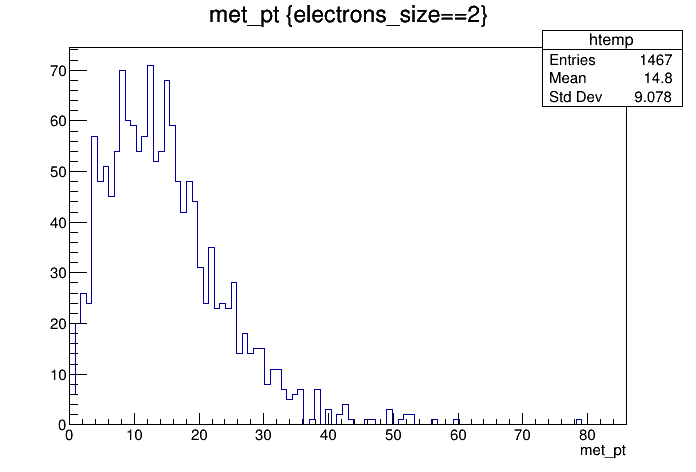

In [49]:
#Esempio 1: voglio disegnare l'energia mancante tutti gli eventi in cui ci sono 2 elettroni
c1 =ROOT.TCanvas()

#Metodo relazionale:
c1.Draw()
#mytree.Draw("jets_size","jets_pt[0]>50 && jets_pt[1]>30")
#mytree.Draw("jets_size","(muontracks_charge[0]==1 && muontracks_charge[1]==-1) || (muontracks_charge[0]==-1 && muontracks_charge[1]==1)")
mytree.Draw("met_pt>>h2(100,0,100)","electrons_size==2")
#si può fare la stessa cosa col metodo project
h3 = ROOT.TH1F("h_test_3", "h_test 3",100,0,100)
mytree.Project("h_test_3","met_pt","electrons_size==2")
mytree.Draw("met_pt","electrons_size==2")


In [45]:
mytree.Draw("met_pt","electrons_size==2")

1467

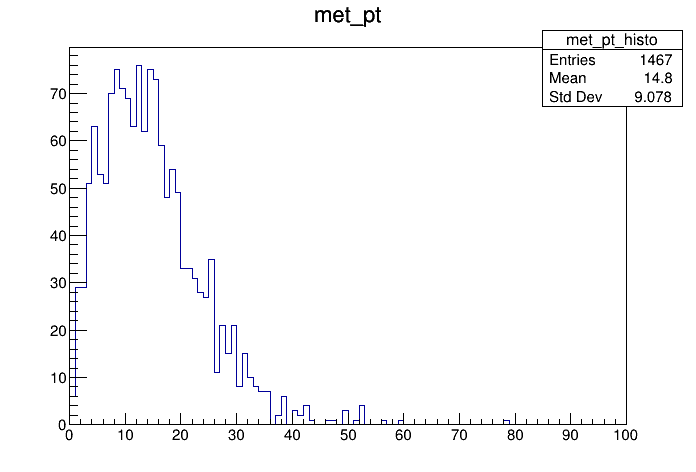

In [46]:
#Metodo iterativo:
h1= ROOT.TH1F("met_pt_histo","met_pt",100,0,100)
for i in range(mytree.GetEntries()):
    mytree.GetEntry(i)
    if(mytree.electrons_size==2):
        h1.Fill(mytree.met_pt[0])


#Se voglio proiettare in un istogramma una variabile che ottengo col metodo 1) posso usare Project
#mytree.Project("met_pt_histo","met_pt","electrons_size==2 && electrons_charge==1 ")        

c2=ROOT.TCanvas()
c2.Draw()
h1.Draw()

In [50]:
#Vediamo i valori della carica:
mytree.Scan("electrons_size:electrons_charge","electrons_size==2","")

2934

***********************************************
*    Row   * Instance * electrons * electrons *
***********************************************
*        2 *        0 *         2 *        -1 *
*        2 *        1 *         2 *         1 *
*       11 *        0 *         2 *         1 *
*       11 *        1 *         2 *        -1 *
*       13 *        0 *         2 *         1 *
*       13 *        1 *         2 *        -1 *
*       24 *        0 *         2 *         1 *
*       24 *        1 *         2 *        -1 *
*       32 *        0 *         2 *        -1 *
*       32 *        1 *         2 *         1 *
*       34 *        0 *         2 *         1 *
*       34 *        1 *         2 *        -1 *
*       39 *        0 *         2 *        -1 *
*       39 *        1 *         2 *         1 *
*       62 *        0 *         2 *         1 *
*       62 *        1 *         2 *        -1 *
*       65 *        0 *         2 *         1 *
*       65 *        1 *         2 *     

Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or 

## Domanda 0: Quale dei due metodi è più facile?
<details>
  <summary>Risposta 0</summary>
  In questo caso ovviamente il metodo relazionale!
</details>


## Domanda 1: perché i plot sono diversi?
<details>
  <summary>Risposta 1</summary>
  Nel caso relazionale abbiamo lasciato a ROOT la scelta del binnaggio, nell'altro l'abbiamo scelto noi.
  In realtà nel caso relazionale il bin
</details>

## Domanda 3: e se volessi sapere "quando ci sono 2 elettroni/muoni con carica opposta"? 
## Oppure, ad esempio, quante coppie di elettroni di carica opposta ci sono?

1475


1443

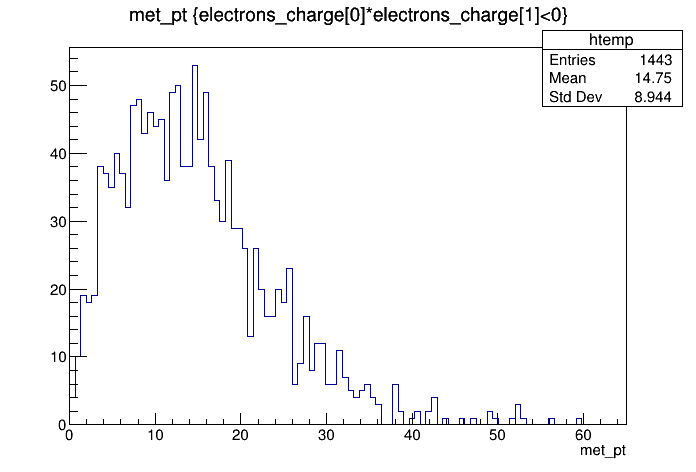

In [71]:
c1.Draw()
#mytree.Scan("electrons_charge","electrons_size>0")
print(mytree.GetEntries("electrons_size>1"))
mytree.Draw("met_pt","electrons_charge[0]*electrons_charge[1]<0")

2584


3310

***********************************
*    Row   * Instance * muontrack *
***********************************
*        9 *        0 *         1 *
*        9 *        1 *         1 *
*        9 *        2 *         1 *
*       26 *        0 *        -1 *
*       26 *        1 *         1 *
*       26 *        2 *         1 *
*       26 *        3 *        -1 *
*       28 *        0 *         1 *
*       28 *        1 *        -1 *
*       28 *        2 *         1 *
*       28 *        3 *         1 *
*       29 *        0 *        -1 *
*       29 *        1 *        -1 *
*       29 *        2 *         1 *
*       29 *        3 *         1 *
*       29 *        4 *         1 *
*       29 *        5 *        -1 *
*       29 *        6 *         1 *
*       44 *        0 *         1 *
*       44 *        1 *        -1 *
*       44 *        2 *        -1 *
*       49 *        0 *         1 *
*       49 *        1 *        -1 *
*       49 *        2 *         1 *
*       60 *        0 *     

Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or 

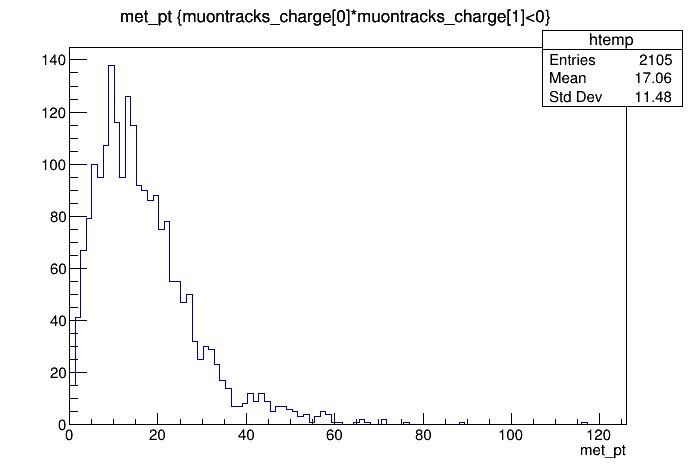

In [73]:
c1.Draw()
#mytree.Scan("electrons_charge","electrons_size>0")
print(mytree.GetEntries("muontracks_size>1"))
mytree.Draw("met_pt","muontracks_charge[0]*muontracks_charge[1]<0")
mytree.Scan("muontracks_charge","muontracks_size>2")